# 1 Data Cleaning & Preprocessing

In [30]:
from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/MyDrive/University/'

import os
files = os.listdir(folder_path)
print(files)

import pandas as pd
import re
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

!pip install nltk spacy

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Load SpaCy model
!python -m spacy download en_core_web_sm

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Year 1', 'SEF rezumat.gdoc', 'ADA rezumat.gdoc', 'SSD.gdoc', 'DB documentation.gdoc', 'AIF colabs', 'SSD Presentation.gslides', 'CE notes exam.gdoc', 'VID20240521133020.mp4', 'IIoTCA Documentation.gdoc', 'imdb_reviews.csv', 'cleaned_reviews.csv', 'imdb_reviews_short.csv', 'cleaned_reviews.gsheet', 'tfidf_dataframe.csv', 'sorted_tfidf_dataframe.csv', 'topic_distribution.png']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [31]:
file_path = folder_path + 'imdb_reviews_short.csv'
# Load the dataset with appropriate column names
data = pd.read_csv(file_path, header=0, names=['review', 'sentiment'])

# Remove HTML tags
data['review'] = data['review'].apply(lambda x: re.sub('<br\s*/?>', ' ', x))
data['review'] = data['review'].apply(lambda x: re.sub('<.*?>', '', x))

# Lowercase Conversion
data['review'] = data['review'].str.lower()

# Tokenization, Stop Words Removal, and Lemmatization
nlp = spacy.load("en_core_web_sm")
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stopwords.words('english') and token.is_alpha]
    return ' '.join(tokens)

data['review'] = data['review'].apply(preprocess)

# Handle Missing Data
data.dropna(inplace=True)

# Save the cleaned data back to Google Drive
cleaned_file_path = folder_path + 'cleaned_reviews.csv'
data.to_csv(cleaned_file_path, index=False)
data.head()


,review,sentiment
0,one reviewer mention watch oz episode hook rig...,positive
1,wonderful little production film technique old...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive


# Term Frequency & Inverse Document Frequency (TF-IDF)

Sorted TF-IDF Matrix by Sum of Scores:
               0
movie  67.062776
film   54.688211
see    34.210944
one    31.795529
make   29.264219
like   28.729482
good   27.717981
bad    25.903914
get    25.333344
watch  24.904279
well   23.824585
would  22.224334
think  21.839173
story  21.786868
time   21.730292
Top Features by TF-IDF Scores:
Document 1: ['oz', 'violence', 'prison', 'inmate', 'forget']
Document 2: ['realism', 'technique', 'particularly', 'production', 'piece']
Document 3: ['woody', 'witty', 'comedy', 'johanson', 'addiction']
Document 4: ['jake', 'parent', 'closet', 'drama', 'zombie']
Document 5: ['mattei', 'mr', 'relation', 'different', 'connect']
Document 6: ['midget', 'bette', 'thumb', 'davis', 'noble']
Document 7: ['sea', 'would', 'tv', 'let', 'excitement']
Document 8: ['show', 'air', 'original', 'believe', 'innovative']
Document 9: ['keitel', 'film', 'harvey', 'obsessive', 'encourage']
Document 10: ['wrench', 'laughter', 'mom', 'camp', 'gut']

TF-IDF Statistics:
Mean 

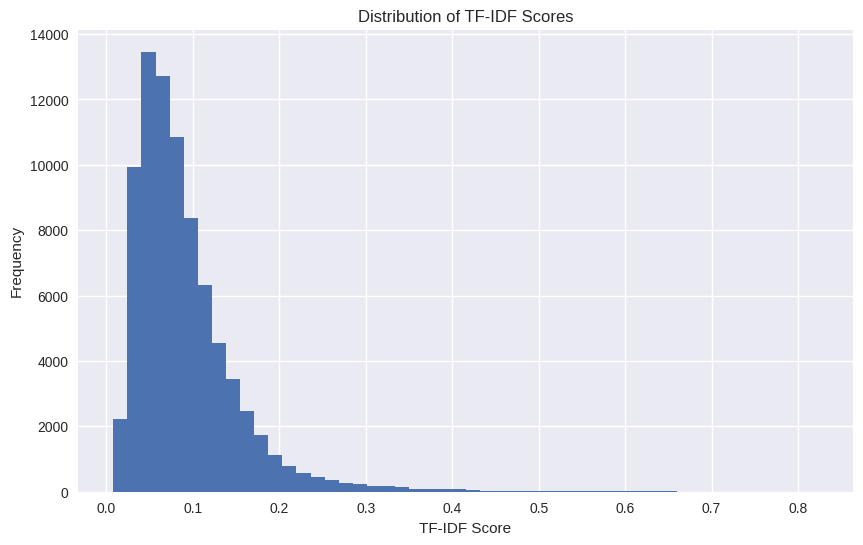

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load cleaned dataset
cleaned_file_path = '/content/drive/MyDrive/University/cleaned_reviews.csv'
data = pd.read_csv(cleaned_file_path)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit TF-IDF Vectorizer on the reviews
tfidf_matrix = tfidf_vectorizer.fit_transform(data['review'])

# Get feature names (words) from TF-IDF Vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Compute sum of TF-IDF scores for each feature (word) across all documents
sum_tfidf_scores = tfidf_matrix.sum(axis=0)

# Create a DataFrame to store feature names and their corresponding sum of TF-IDF scores
tfidf_sum_df = pd.DataFrame(sum_tfidf_scores, columns=feature_names)

# Transpose the DataFrame for easier sorting and display
tfidf_sum_df = tfidf_sum_df.transpose()

# Sort DataFrame by the sum of TF-IDF scores in descending order
tfidf_sum_df = tfidf_sum_df.sort_values(by=0, ascending=False)

# Print sorted TF-IDF DataFrame
print("Sorted TF-IDF Matrix by Sum of Scores:")
print(tfidf_sum_df.head(15))

# Optionally, you can save the sorted TF-IDF DataFrame to further use in subsequent analysis
sorted_tfidf_file = '/content/drive/MyDrive/University/sorted_tfidf_dataframe.csv'
tfidf_sum_df.to_csv(sorted_tfidf_file)

import numpy as np

# Get indices of sorted TF-IDF scores
sorted_indices = np.argsort(tfidf_matrix.toarray(), axis=1)[:, ::-1]

# Print top N features with highest TF-IDF scores for each document
print("Top Features by TF-IDF Scores:")
for i in range(min(len(data),10)):
    top_features_indices = sorted_indices[i, :5]  # Print top 5 features
    top_features = [feature_names[idx] for idx in top_features_indices]
    print(f"Document {i+1}: {top_features}")


# Calculate TF-IDF statistics
mean_tfidf = np.mean(tfidf_matrix.data)
median_tfidf = np.median(tfidf_matrix.data)
max_tfidf = np.max(tfidf_matrix.data)
min_tfidf = np.min(tfidf_matrix.data)

print("\nTF-IDF Statistics:")
print(f"Mean TF-IDF: {mean_tfidf}")
print(f"Median TF-IDF: {median_tfidf}")
print(f"Maximum TF-IDF: {max_tfidf}")
print(f"Minimum TF-IDF: {min_tfidf}")


# Calculate document frequencies
doc_freq = np.sum(tfidf_matrix > 0, axis=0)

# Print document frequencies for selected terms
print("\nDocument Frequencies:")
for i in range(10):
    print(f"Term '{feature_names[i]}': {doc_freq[0, i]} documents")


# Calculate sparsity of TF-IDF matrix
sparsity = 1.0 - np.count_nonzero(tfidf_matrix.toarray()) / np.prod(tfidf_matrix.shape)

# Print sparsity information
print(f"\nTF-IDF Matrix Sparsity: {sparsity}")

import matplotlib.pyplot as plt

# Plot histogram of TF-IDF scores for all terms
plt.figure(figsize=(10, 6))
plt.hist(tfidf_matrix.data, bins=50)
plt.title('Distribution of TF-IDF Scores')
plt.xlabel('TF-IDF Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



# 3 Sentiment analysis

Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.79      0.80       104
    positive       0.78      0.80      0.79        96

    accuracy                           0.80       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.80      0.80      0.80       200


Confusion Matrix:
[[82 22]
 [19 77]]


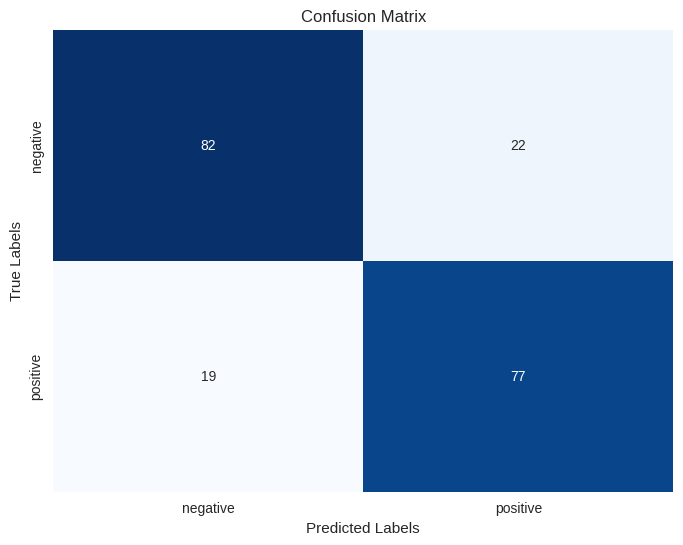

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
cleaned_file_path = '/content/drive/MyDrive/University/cleaned_reviews.csv'
data = pd.read_csv(cleaned_file_path)

# Load precomputed TF-IDF matrix
# Split data into training and testing sets
X = tfidf_matrix  # TF-IDF matrix
y = data['sentiment']  # Target variable (sentiment)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict sentiment on test data
y_pred = svm_classifier.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# 4 Topic Modelling

Number of documents: 999
                                              review sentiment
0  one reviewer mention watch oz episode hook rig...  positive
1  wonderful little production film technique old...  positive
2  think wonderful way spend time hot summer week...  positive
3  basically family little boy jake think zombie ...  negative
4  petter mattei love time money visually stunnin...  positive
Top 10 words for each topic:
Topic 1:
unhappy, john, ably, cinematic, choppy, kent, centre, purpose, maginnis, amp

Topic 2:
unhappy, lousy, physical, cinematic, cameo, davie, audio, heartfelt, profoundly, choppy

Topic 3:
lousy, cameo, physical, unhappy, unflattering, john, jmv, landmark, davie, kent

Topic 4:
lousy, unhappy, cinematic, physical, let, jessica, cameo, wee, winter, kent

Topic 5:
unhappy, lousy, cinematic, kent, physical, stupidly, cameo, profoundly, depressing, frightmare

Topic 6:
unhappy, audio, cinematic, physical, lousy, heartfelt, kent, cameo, sanctimony, pain

Topic 7

<ipython-input-34-d66bfb962725>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dominant Topic', data=data, palette='viridis')


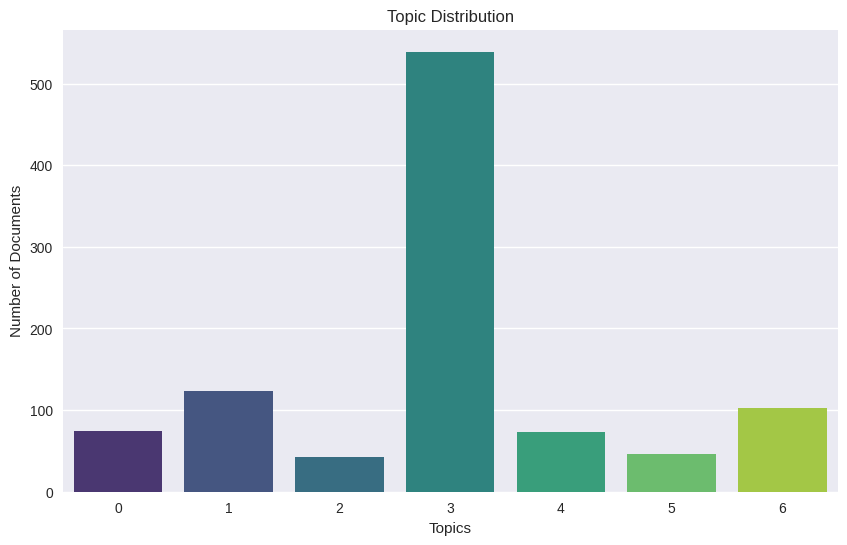

<Figure size 800x550 with 0 Axes>

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_file_path = '/content/drive/MyDrive/University/cleaned_reviews.csv'
data = pd.read_csv(cleaned_file_path)

# Display basic information about the dataset
print(f"Number of documents: {len(data)}")
print(data.head())

# Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
dtm = vectorizer.fit_transform(data['review'])

# Initialize LDA model
num_topics = 7  # Number of topics to discover
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit LDA model on the document-term matrix
lda.fit(dtm)

# Function to display topics with top words
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

# Print topics with top words
no_top_words = 10
print(f"Top {no_top_words} words for each topic:")
feature_names = list(vectorizer.vocabulary_.keys())

display_topics(lda, feature_names, no_top_words)

# Visualize topic distribution across documents
topic_results = lda.transform(dtm)
data['Dominant Topic'] = topic_results.argmax(axis=1)

# Plotting topic distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Dominant Topic', data=data, palette='viridis')
plt.title('Topic Distribution')
plt.xlabel('Topics')
plt.ylabel('Number of Documents')
plt.show()

# Save visualizations and results
plt.savefig('/content/drive/MyDrive/University/topic_distribution.png')


# 5 PoS Tags & NER

Part-of-Speech Tags:
one: NUM
reviewer: NOUN
mention: NOUN
watch: NOUN
oz: ADP
episode: NOUN
hook: NOUN
right: ADV
exactly: ADV
happen: VERB
first: ADJ
thing: NOUN
strike: NOUN
oz: ADP
brutality: NOUN
unflinche: PROPN
scene: PROPN
violence: NOUN
set: VERB
right: ADJ
word: NOUN
go: VERB
trust: NOUN
show: NOUN
faint: NOUN
hearted: ADJ
timid: ADJ
show: NOUN
pull: VERB
punch: NOUN
regard: NOUN
drug: NOUN
sex: NOUN
violence: NOUN
hardcore: NOUN
classic: ADJ
use: NOUN
word: NOUN
call: NOUN
oz: ADP
nickname: NOUN
give: VERB
oswald: NOUN
maximum: ADJ
security: NOUN
state: NOUN
penitentary: NOUN
focus: NOUN
mainly: ADV
emerald: PROPN
city: PROPN
experimental: PROPN
section: NOUN
prison: NOUN
cell: NOUN
glass: NOUN
front: NOUN
face: NOUN
inward: ADP
privacy: PROPN
high: ADJ
agenda: NOUN
em: PROPN
city: NOUN
home: NOUN
many: ADJ
aryan: PROPN
muslim: PROPN
gangsta: PROPN
latinos: PROPN
christians: PROPN
italian: ADJ
irish: ADJ
scuffle: NOUN
death: NOUN
stare: NOUN
dodgy: NOUN
dealing: VERB
shady: 

<ipython-input-35-7f4315e8928f>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette='viridis')


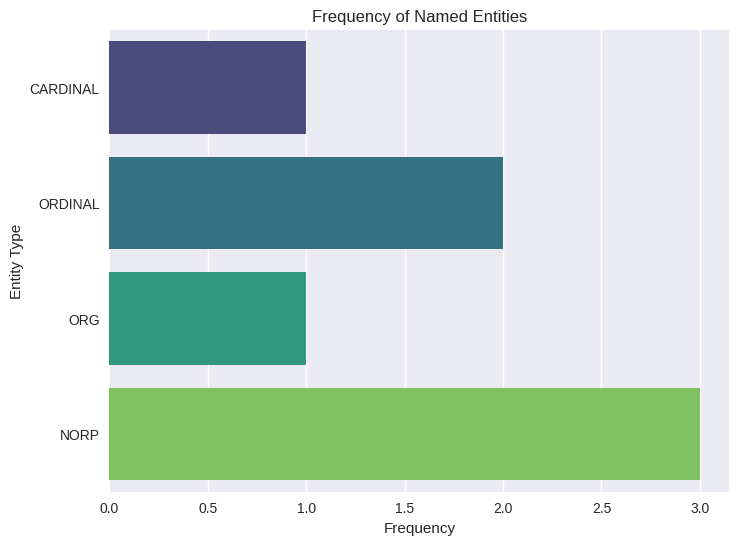

In [35]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_file_path = '/content/drive/MyDrive/University/cleaned_reviews.csv'
data = pd.read_csv(cleaned_file_path)

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to perform PoS tagging, NER, entity frequency, and dependency parsing
def analyze_review(text):
    doc = nlp(text)

    # Part-of-Speech Tags
    pos_tags = [(token.text, token.pos_) for token in doc]

    # Named Entities
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    # Frequency of Named Entities
    entity_counter = Counter([ent.label_ for ent in doc.ents])
    entity_freq = {label: count for label, count in entity_counter.items()}

    # Dependency Parsing
    root = next(token for token in doc if token.dep_ == 'ROOT')
    subject = next(token for token in doc if token.dep_ == 'nsubj')

    return pos_tags, entities, entity_freq, root.text, subject.text

# Example usage on one review
sample_review = data['review'].iloc[0]
pos_tags, entities, entity_freq, root, subject = analyze_review(sample_review)

# Print PoS tags, NER entities, and additional features
print("Part-of-Speech Tags:")
for token, pos_tag in pos_tags:
    print(f"{token}: {pos_tag}")

print("\nNamed Entities:")
for entity, label in entities:
    print(f"{entity}: {label}")

print("\nEntity Frequency:")
for label, count in entity_freq.items():
    print(f"{label}: {count}")

print(f"\nRoot of the sentence: {root}")
print(f"Subject of the sentence: {subject}")

# Visualize entity frequency (optional)
labels, counts = zip(*entity_freq.items())
plt.figure(figsize=(8, 6))
sns.barplot(x=counts, y=labels, palette='viridis')
plt.title('Frequency of Named Entities')
plt.xlabel('Frequency')
plt.ylabel('Entity Type')
plt.show()


# 6 EDA / Data Visualization

Initial data exploration

In [36]:
import pandas as pd

# Load cleaned dataset (adjust path as per your setup)
cleaned_file_path = '/content/drive/MyDrive/University/cleaned_reviews.csv'
data = pd.read_csv(cleaned_file_path)

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

# Show summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Show the first few rows of the dataset
print("\nFirst Few Rows:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     999 non-null    object
 1   sentiment  999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB
None

Summary Statistics:
                                                   review sentiment
count                                                 999       999
unique                                                999         2
top     one reviewer mention watch oz episode hook rig...  positive
freq                                                    1       501

First Few Rows:
                                              review sentiment
0  one reviewer mention watch oz episode hook rig...  positive
1  wonderful little production film technique old...  positive
2  think wonderful way spend time hot summer week...  positive
3  basically family little boy jake think z

Basic distributions

<ipython-input-37-1b3bd813cae7>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


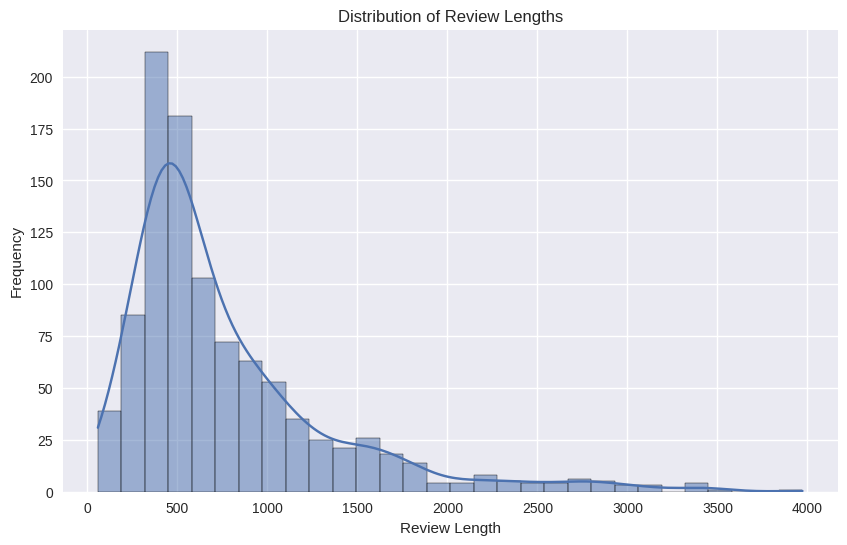

<ipython-input-37-1b3bd813cae7>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='viridis')


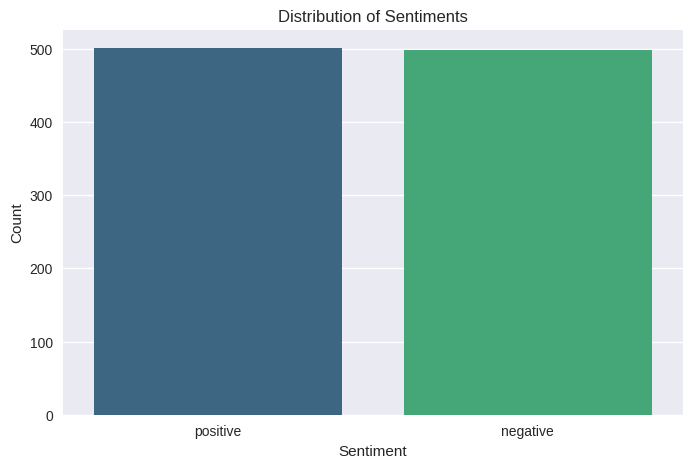

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting parameters
plt.style.use('seaborn')

# Distribution of review lengths
data['review_length'] = data['review'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Distribution of sentiments
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Wordclouds

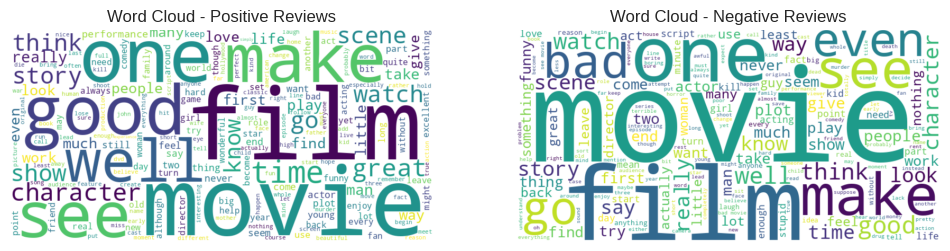

In [38]:
from wordcloud import WordCloud

# Separate positive and negative reviews
positive_reviews = ' '.join(data[data['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(data[data['sentiment'] == 'negative']['review'])

# Generate word clouds for positive and negative reviews
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Reviews')
plt.axis('off')

plt.show()


<ipython-input-39-7af8c9a20e82>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['sentiment'], bins=3, kde=False, palette='Set2')


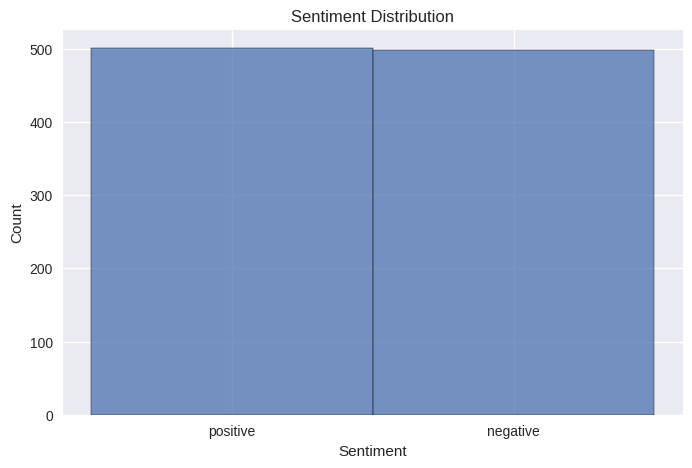

In [39]:
# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['sentiment'], bins=3, kde=False, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [40]:
# Summary of EDA findings
positive_count = (data['sentiment'] == 'positive').sum()
negative_count = (data['sentiment'] == 'negative').sum()

print(f"Number of positive reviews: {positive_count}")
print(f"Number of negative reviews: {negative_count}")



Number of positive reviews: 501
Number of negative reviews: 498
